# Banana Navigation

## I. Preparation

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import deque
from dqn_agent import Agent

In [2]:
def dqn(brain_name, agent, n_episodes=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
      
    scores = []                        
    scores_window = deque(maxlen=100)
    scores_pass = 13
    eps = eps_start 
    solved = False
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   
        score = 0
        while True:
            action = agent.act(state, eps)            
            brain_info = env.step(action)[brain_name]
            next_state = brain_info.vector_observations[0]
            reward = brain_info.rewards[0]
            done = brain_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps) 
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=scores_pass:
            if solved == False:
                print('\n * Environment first solved in {:d} episodes! Average Score: {:.2f}. Continue training...'.format(i_episode, np.mean(scores_window)))
                solved = True
            scores_pass = np.mean(scores_window)
            torch.save(agent.qnetwork_local.state_dict(), 'trained_agent.pth')
    return scores

def plot_score(scores, rolling_window=100):
    df_scores = pd.DataFrame(scores, columns=['EpisodeScore'])
    df_scores['MovingAvg100'] = df_scores['EpisodeScore'].rolling(rolling_window).mean()
    df_scores.plot(color=['grey', 'red'])
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

## II. Environment

In [3]:
# Environment
env = UnityEnvironment(file_name="Banana/Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## III. Train an Agent

In [4]:
# Train or load model
train_model = True

Episode 100	Average Score: 2.33
Episode 200	Average Score: 6.66
Episode 300	Average Score: 10.99
Episode 350	Average Score: 13.05
 * Environment first solved in 350 episodes! Average Score: 13.05. Continue training...
Episode 400	Average Score: 13.49
Episode 500	Average Score: 15.40
Episode 600	Average Score: 15.32
Episode 700	Average Score: 16.78
Episode 800	Average Score: 16.19
Episode 900	Average Score: 15.98
Episode 1000	Average Score: 16.18


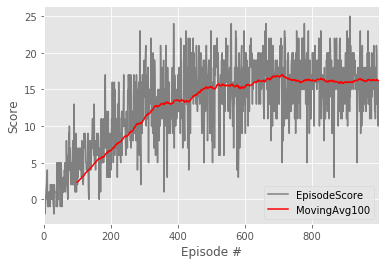

In [5]:
# Agent
action_size = brain.vector_action_space_size
state_size = brain.vector_observation_space_size
agent = Agent(state_size=state_size, action_size=action_size, device=device)
if train_model:
    scores = dqn(brain_name, agent, eps_decay=0.99)
    plot_score(scores)
else:
    agent.qnetwork_local.load_state_dict(torch.load('trained_agent.pth'))

## IV. Watch the Smart Agent

In [7]:
# Watch the trained agent
env_info = env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations[0]
score = 0
while True:
    action = agent.act(state, eps=0)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0] 
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if done: 
        break
print("Score: {}".format(score))
# env.close()

Score: 20.0


![Trained](https://media.giphy.com/media/vFKqnCdLPNOKc/giphy.gif)

